Basé sur l'article "[The KL-UCB algortihm for bounded stochastic bandits and beyond](https://arxiv.org/abs/1102.2490)" de **Aurélien Garivier** et **Olivier Cappé**.

In [56]:
import time
import numpy as np
import math
import matplotlib.pyplot as plt
import pickle
import random
%matplotlib inline

In [57]:
%load_ext autoreload
%autoreload 2
import kl_ucb_policy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
#Paramètres du scenario 4
#Bernoulli Parameters
p0 = np.array([1., .6, .4, .25, .18, .1, .06, .04]) #0
p1 = np.array([.8, .6, .4, .25, .18, .1, .06, .04]) #1
p2 = np.array([.95, .90, .95, .55, .4, .25, .15, .10]) #2
p3 = np.array([.95, .90, .80, .65, .45, .25, .15, .10]) #3
p4 = np.array([.99, .98, .96, .93, .90, .10, .06, .04]) #4
p5 = np.array([.90, .80, .70, .55, .45, .35, .20, .10]) #5
p6 = np.array([.90, .80, .70, .55, .50, .38, .30, .20]) #6
p7 = np.array([.90, .80, .70, .55, .50, .38, .30, .25]) #7

rate = np.array([6, 9, 12, 18, 24, 36, 48, 64])

tp0 = np.multiply(p0,rate)
tp1 = np.multiply(p1,rate)
tp2 = np.multiply(p2,rate)
tp3 = np.multiply(p3,rate)
tp4 = np.multiply(p4,rate)
tp5 = np.multiply(p5,rate)
tp6 = np.multiply(p6,rate)
tp7 = np.multiply(p7,rate)

p = np.array([p0, p1, p2, p3, p4, p5, p6, p7])

K= p0.shape[0] #Number of branches
# delta= ( np.ones(K)*np.max(tp) ) - tp
delta0 = ( np.ones(K)*np.max(tp0) ) - tp0
# delta1 = ( np.ones(K)*np.max(tp) ) - tp
# delta2 = ( np.ones(K)*np.max(tp) ) - tp
T= 5000 #Time periods
runs = 1 #Number of iterations
print("Pi:",tp0)
print("Pi:",tp1)
print("Pi:",tp2)
print("Pi:",tp3)
print("Pi:",tp4)
print("Pi:",tp5)
print("Pi:",tp6)
print("Pi:",tp7)
# print("delta:",delta)


Pi: [6.   5.4  4.8  4.5  4.32 3.6  2.88 2.56]
Pi: [4.8  5.4  4.8  4.5  4.32 3.6  2.88 2.56]
Pi: [ 5.7  8.1 11.4  9.9  9.6  9.   7.2  6.4]
Pi: [ 5.7  8.1  9.6 11.7 10.8  9.   7.2  6.4]
Pi: [ 5.94  8.82 11.52 16.74 21.6   3.6   2.88  2.56]
Pi: [ 5.4  7.2  8.4  9.9 10.8 12.6  9.6  6.4]
Pi: [ 5.4   7.2   8.4   9.9  12.   13.68 14.4  12.8 ]
Pi: [ 5.4   7.2   8.4   9.9  12.   13.68 14.4  16.  ]


## KL-UCB

In [59]:
gors = kl_ucb_policy.KLUCB_SW(K, rate, 500) #Optimal Graphical OptimalRate Sampling
total_rewards_list_gors = np.zeros((runs, T))
actions_list_gors = []
klucb = kl_ucb_policy.KLUCBPolicy(K, rate) #Original KL UCB
total_rewards_list_klucb = np.zeros((runs, T))
actions_list_klucb = []
start_time = time.time()

for run in range(runs):
    gors.reset()
    actions_gors = np.zeros((K, T), dtype=np.int)
    rewards_gors = np.zeros((K, T), dtype=np.float)
    klucb.reset()
    actions_klucb = np.zeros((K, T), dtype=np.int)
    rewards_klucb = np.zeros((K, T), dtype=np.float)
    index = 0
    p_index = 0
    for t in range(T):
        print('at time slot: ',t)
        if index == T//8:
            p_index += 1
            index = 0
            print(p_index)
        else:
            index += 1
        arm_gors = gors.select_next_arm()
        actions_gors[arm_gors, t] = 1
        rewards_gors[arm_gors, t] = np.random.binomial(1, p[p_index][arm_gors]) * rate[arm_gors]
        gors.update_state(arm_gors, rewards_gors[arm_gors, t] / rate[arm_gors])

        arm_klucb = klucb.select_next_arm()
        actions_klucb[arm_klucb, t] = 1
        rewards_klucb[arm_klucb, t] = np.random.binomial(1, p[p_index][arm_gors]) * rate[arm_klucb]
        klucb.update_state(arm_klucb, rewards_klucb[arm_klucb, t] / rate[arm_klucb])

    cumulative_rewards_gors = np.cumsum(rewards_gors, axis=1) #Cumulative rewards of each arm according to time
    total_rewards_gors = np.sum(cumulative_rewards_gors, axis=0) #Cumulative rewards of all arms according to time
    total_rewards_list_gors[run, :] = np.copy(total_rewards_gors)
    actions_list_gors.append(np.copy(actions_gors))

    cumulative_rewards_klucb = np.cumsum(rewards_klucb, axis=1)
    total_rewards_klucb = np.sum(cumulative_rewards_klucb, axis=0)
    total_rewards_list_klucb[run, :] = np.copy(total_rewards_klucb)
    actions_list_klucb.append(np.copy(actions_klucb))

time_spent = time.time() - start_time

at time slot:  0
at time slot:  1
at time slot:  2
at time slot:  3
at time slot:  4
at time slot:  5
at time slot:  6
at time slot:  7
at time slot:  8
at time slot:  9
at time slot:  10
at time slot:  11
at time slot:  12
at time slot:  13
at time slot:  14
at time slot:  15
at time slot:  16
at time slot:  17
at time slot:  18
at time slot:  19
at time slot:  20
at time slot:  21
at time slot:  22
at time slot:  23
at time slot:  24
at time slot:  25
at time slot:  26
at time slot:  27
at time slot:  28
at time slot:  29
at time slot:  30
at time slot:  31
at time slot:  32
at time slot:  33
at time slot:  34
at time slot:  35
at time slot:  36
at time slot:  37
at time slot:  38
at time slot:  39
at time slot:  40
at time slot:  41
at time slot:  42
at time slot:  43
at time slot:  44
at time slot:  45
at time slot:  46
at time slot:  47
at time slot:  48
at time slot:  49
at time slot:  50
at time slot:  51
at time slot:  52
at time slot:  53
at time slot:  54
at time slot:  55
at

C:\Users\Jarvis\AppData\Local\Temp\ipykernel_24280\1882134214.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actions_gors = np.zeros((K, T), dtype=np.int)
C:\Users\Jarvis\AppData\Local\Temp\ipykernel_24280\1882134214.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy

at time slot:  108
at time slot:  109
at time slot:  110
at time slot:  111
at time slot:  112
at time slot:  113
at time slot:  114
at time slot:  115
at time slot:  116
at time slot:  117
at time slot:  118
at time slot:  119
at time slot:  120
at time slot:  121
at time slot:  122
at time slot:  123
at time slot:  124
at time slot:  125
at time slot:  126
at time slot:  127
at time slot:  128
at time slot:  129
at time slot:  130
at time slot:  131
at time slot:  132
at time slot:  133
at time slot:  134
at time slot:  135
at time slot:  136
at time slot:  137
at time slot:  138
at time slot:  139
at time slot:  140
at time slot:  141
at time slot:  142
at time slot:  143
at time slot:  144
at time slot:  145
at time slot:  146
at time slot:  147
at time slot:  148
at time slot:  149
at time slot:  150
at time slot:  151
at time slot:  152
at time slot:  153
at time slot:  154
at time slot:  155
at time slot:  156
at time slot:  157
at time slot:  158
at time slot:  159
at time slot

In [60]:
print("Time for KL-UCB (Newton), with T =", T, ", runs =", runs, ":", (time_spent), "seconds")

Time for KL-UCB (Newton), with T = 5000 , runs = 1 : 3.328352689743042 seconds


## Résultats

## Gain total moyen

In [61]:
mean_total_rewards_gors = np.mean(total_rewards_list_gors, axis=0)
mean_total_rewards_klucb = np.mean(total_rewards_list_klucb, axis=0)
print("t & Reward (total) G-ORS :", t, mean_total_rewards_gors[t])
print("t & Reward (total) KL-UCB :", t, mean_total_rewards_klucb[t])

t & Reward (total) G-ORS : 4999 34333.0
t & Reward (total) KL-UCB : 4999 232910.0


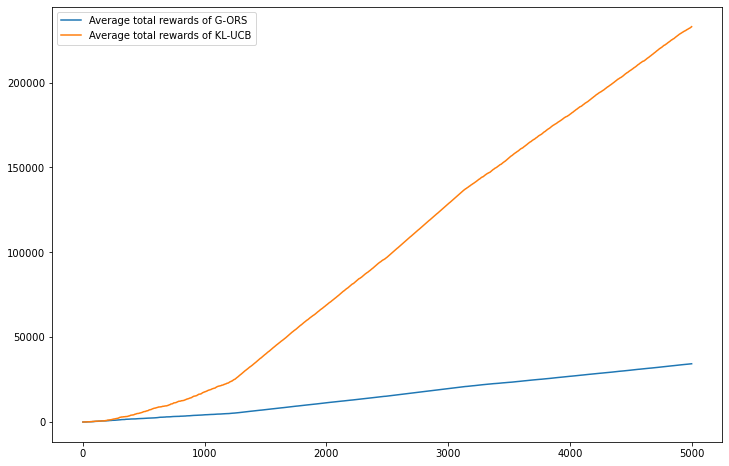

In [62]:
fig=plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(mean_total_rewards_gors, linestyle='-', label='Average total rewards of G-ORS')
ax1.plot(mean_total_rewards_klucb, linestyle='-', label='Average total rewards of KL-UCB')
ax1.legend(loc='best')
plt.show()

In [63]:
#Regrets calculation for G-ORS
total_action_gors = np.zeros((K, T))
for actions_gors in actions_list_gors:
    total_action_gors += np.cumsum(actions_gors, axis=1) #The cumulative times of each arm to be selected
total_action_gors = total_action_gors / runs
regret_cumule_gors = np.dot(delta, total_action_gors[:, :]) # Cumulative regrets
#Regrest calculation for KL-UCB
total_action_klucb = np.zeros((K, T))
for actions_klucb in actions_list_klucb:
    total_action_klucb += np.cumsum(actions_klucb, axis=1) #The cumulative times of each arm to be selected
total_action_klucb = total_action_klucb / runs
regret_cumule_klucb = np.dot(delta, total_action_klucb[:, :]) # Cumulative regrets

NameError: name 'delta' is not defined

In [ ]:
fig=plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)

ax1.plot(regret_cumule_gors[:],linestyle='-', label='G-ORS')
ax1.plot(regret_cumule_klucb[:],linestyle='-', label='KL-UCB')

ax1.legend(loc='best')
ax1.grid()
ax1.set_title('Evolution of average cumulative regrets according to time')
#ax1.xscale('log')
plt.show()

## Distribution du regret

In [ ]:
T0 = 4999

In [ ]:
#G-ORS
distribution_regret_gors = []
distribution_regret_klucb = []
for actions_gors in actions_list_gors:
    distribution_regret_gors.append(np.dot(delta, np.sum(actions_gors[:, :T0], axis=1)))
for actions_klucb in actions_list_klucb:
    distribution_regret_klucb.append(np.dot(delta, np.sum(actions_klucb[:, :T0], axis=1)))

In [ ]:
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.boxplot([
        distribution_regret_gors,
        distribution_regret_klucb
    ])
ax.set_xticklabels([
        'G-ORS',
        'KL-UCB'
    ])

ax.set_title('Boxplot of regret when t = 5000')
plt.show()